The dataset comes from [this website](https://www.cityscapes-dataset.com/dataset-overview/) and you can download it at [this direct link](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_gtFine_trainvaltest.zip).

A faire :
- [x] Comprendre ce qu'est et pourquoi utiliser un "générateur à la volée". Script [ici](https://github.com/srihari-humbarwadi/cityscapes-segmentation-with-Unet/blob/master/batch_training.py).
  - Finalement le script a l'air d'avoir été fait avec un ancien générateur python. Au pire on aurait utilisé le mot clef yield mais mieux encore, il y a le tf.data.Dataset qui va nous aider à le faire.
- [ ] Définir quelles sont les variables dont on aura besoin pour entrainer notre modèle
- [ ] Créer un générateur pour récupérer ces données.
- [ ] Entrainer le modèle

Ressources :
1. Un guide classique sur la segmentation image avec exactement ce dataset [ici](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html)
2. A entrainé Unet sur le dataset [ici](https://github.com/srihari-humbarwadi/cityscapes-segmentation-with-Unet)
3. Kaggle d'entrainement de PSPNet sur le dataset [ici](https://www.kaggle.com/code/santhalnr/cityscapes-image-segmentation-pspnet/notebook)
4. La doc de python [ici](https://docs.python.org/3/index.html)
   

# Gathering the data

## Downloading

In [2]:
import zipfile
import urllib

from url import file1_url, file2_url

# Will try to download the files

# Dataset archive whith labels
file_path = 'P8_Cityscapes_gtFine_trainvaltest.zip'
# Dataset archive with images
file_path_2 = 'P8_Cityscapes_leftImg8bit_trainvaltest.zip'

# Check if file exists
if not os.path.isfile(file_path):
    print(f'{file_path} archive does not exist. Downloading from internet...')
    urllib.request.urlretrieve(file1_url, file_path)
    print('Download complete.')

# Check if file exists
if not os.path.isfile(file_path_2):
    print(f'{file_path_2} archive does not exist. Downloading from internet...')
    urllib.request.urlretrieve(file2_url, file_path_2)
    print('Download complete.')


## Extraction

In [3]:
# Create another directory and extract the file in it
path_to_extract = f'dataset/'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(path_to_extract)

# Create another directory and extract the file in it
with zipfile.ZipFile(file_path_2, 'r') as zip_ref:
    zip_ref.extractall(path_to_extract)

# Getting familiar with the keras_segmentation library

## Testing a model with a pre-trained model

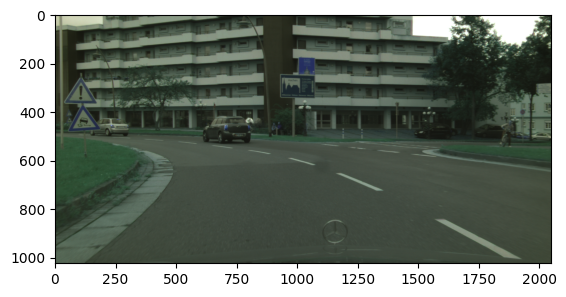

1/1 [==============================] - 2s 2s/step


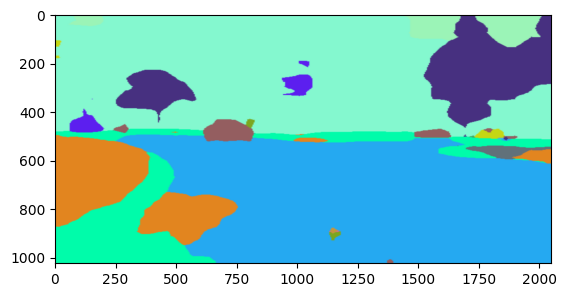

In [75]:
# Test of the module with pre-trained model

from keras_segmentation.pretrained import pspnet_50_ADE_20K

model = pspnet_50_ADE_20K()

in_name = r"C:\Users\barau\Documents\FormationOpenClassrooms\Projet8\data-segmentation\dataset\leftImg8bit\train\aachen\aachen_000000_000019_leftImg8bit.png"
out_name = "out.png"

plt.imshow(cv2.imread(in_name, cv2.IMREAD_COLOR))
plt.show()

out = model.predict_segmentation(
    inp=in_name,
    out_fname=out_name
)

import cv2
import matplotlib.pyplot as plt
# display the image

img = cv2.imread(out_name)
plt.imshow(img)

# Sorting images and preprocessing

## Sorting images into folders

In [12]:
# Without doing a generator, let's segment images and labelling

training_folder = r"dataset\leftImg8bit\train"

# List of all subfolders
subfolders = os.listdir(training_folder)

# List of all images paths in the subfolders
images = []
for subfolder in subfolders:
    for image in os.listdir(os.path.join(training_folder, subfolder)):
        images.append(os.path.join(training_folder, subfolder, image))


# Same for labelling
labelling_folder = r"dataset\gtFine\train"

# List of all subfolders
subfolders = os.listdir(labelling_folder)

# List of all images paths in the subfolders
labels_images = []
for subfolder in subfolders:
    for image in os.listdir(os.path.join(labelling_folder, subfolder)):
        if image.endswith('labelIds.png'):
            labels_images.append(os.path.join(labelling_folder, subfolder, image))

tuple_images_labels = list(zip(images, labels_images))


# Same for validation
validation_folder = r"dataset\leftImg8bit\val"

# List of all subfolders
subfolders = os.listdir(validation_folder)

# List of all images paths in the subfolders
val_images = []
for subfolder in subfolders:
    for image in os.listdir(os.path.join(validation_folder, subfolder)):
        val_images.append(os.path.join(validation_folder, subfolder, image))


# Same for labelling
validation_labelling_folder = r"dataset\gtFine\train"

# List of all subfolders
subfolders = os.listdir(validation_labelling_folder)

# List of all images paths in the subfolders
val_labels_images = []
for subfolder in subfolders:
    for image in os.listdir(os.path.join(validation_labelling_folder, subfolder)):
        if image.endswith('labelIds.png'):
            val_labels_images.append(os.path.join(validation_labelling_folder, subfolder, image))

tuple_val_images_labels = list(zip(val_images, val_labels_images))

In [13]:
import shutil
import os
import random

# Creating folder training_data
training_data_folder = r"processed_data\training_data"
if not os.path.exists(training_data_folder):
    os.makedirs(training_data_folder)

# Creating training_labels folder
training_labels_folder = r"processed_data\training_labels"
if not os.path.exists(training_labels_folder):
    os.makedirs(training_labels_folder)

for image, label in random.choices(tuple_images_labels, k=1000):
    # get image name
    image_name = os.path.basename(image)[:-16] + '.png'
    # Copy image to training_data folder and rename it
    shutil.copy(image, os.path.join(training_data_folder, image_name))
    # Copy label to training_labels folder
    shutil.copy(label, os.path.join(training_labels_folder, image_name))




# Creating validation_data folder
validation_data_folder = r"processed_data\validation_data"
if not os.path.exists(validation_data_folder):
    os.makedirs(validation_data_folder)

# Creating validation_labels folder
validation_labels_folder = r"processed_data\validation_labels"
if not os.path.exists(validation_labels_folder):
    os.makedirs(validation_labels_folder)

for image, label in random.choices(tuple_val_images_labels, k=100):
    # get image name
    image_name = os.path.basename(image)[:-16] + '.png'
    # Copy image to validation_data_folder folder and rename it
    shutil.copy(image, os.path.join(validation_data_folder, image_name))
    # Copy label to validation_labels_folder folder
    shutil.copy(label, os.path.join(validation_labels_folder, image_name))

## Resizing images

Let's resize everything to 416x608 because iit is the most common size for the models.

In [14]:
from tqdm.autonotebook import tqdm

print("Resizing training images...")
for image_name in tqdm(os.listdir(training_data_folder)):
    cv2.resize(cv2.imread(os.path.join(training_data_folder, image_name)), [416, 608])
print("Done.")

print("Resizing training labels...")
for image in tqdm(os.listdir(training_labels_folder)):
    cv2.resize(cv2.imread(os.path.join(training_labels_folder, image_name)), [416, 608])
print("Done.")

print("Resizing validation images...")
for image_name in tqdm(os.listdir(validation_data_folder)):
    cv2.resize(cv2.imread(os.path.join(validation_data_folder, image_name)), [416, 608])
print("Done.")

print("Resizing validation labels...")
for image in tqdm(os.listdir(validation_labels_folder)):
    cv2.resize(cv2.imread(os.path.join(validation_labels_folder, image_name)), [416, 608])
print("Done.")

Resizing training images...


100%|██████████| 844/844 [00:33<00:00, 25.48it/s]


Done.
Resizing training labels...


100%|██████████| 844/844 [00:10<00:00, 83.30it/s]


Done.
Resizing validation images...


100%|██████████| 89/89 [00:03<00:00, 25.26it/s]


Done.
Resizing validation labels...


100%|██████████| 89/89 [00:01<00:00, 82.40it/s]

Done.


## Converting the labels to their categories id

Let's convert id of the label to the category id because we only need to predict those 8 categories and not the 30+ labels. You'll find the difference [here](https://www.cityscapes-dataset.com/dataset-overview/#class-definitions).

In [15]:
import numpy as np
from labels import *

# Create dictionnary for {labelId : label}
id2categoryId = { int(label.id) : int(label.categoryId) for label in labels}

# Create a lambda function that returns the categoryId of a labelId
getCatId = lambda labelId: id2categoryId[labelId]

# Create a vectorized function
matrixId2categoryId = np.vectorize(getCatId)

Different values with the labels id : [ 0  1  3  4  7  8 11 17 20 21 22 23 24 25 26 33]


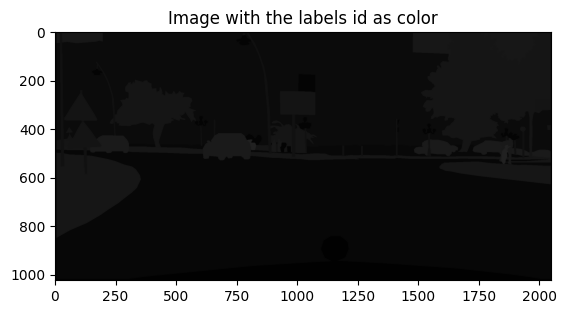

Different values with the categories id : [0 1 2 3 4 5 6 7]


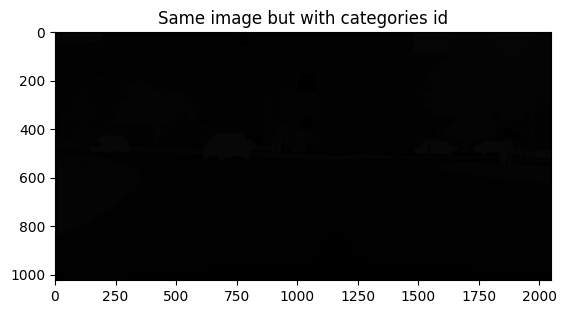

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread(r"C:\Users\barau\Documents\FormationOpenClassrooms\Projet8\data-segmentation\dataset\gtFine\train\aachen\aachen_000000_000019_gtFine_labelIds.png", cv2.IMREAD_COLOR)
print(f"Different values with the labels id : {np.unique(image)}")
plt.imshow(image)
plt.title("Image with the labels id as color")
plt.show()


image = matrixId2categoryId(image)

print(f"Different values with the categories id : {np.unique(image)}")
image = image.astype(np.uint8)
plt.imshow(image)
plt.title("Same image but with categories id")
plt.show()

In [17]:
# Not optimal at all
print("Converting training annotations to categories id...")
for image in tqdm(os.listdir(training_labels_folder)):
    # Read image
    img = cv2.imread(os.path.join(training_labels_folder, image), cv2.IMREAD_COLOR)
    # Convert image to categorical
    img = matrixId2categoryId(img)
    # Save image
    cv2.imwrite(os.path.join(training_labels_folder, image), img)
print("Done.")

print("Converting validation annotations to categories id...")
for image in tqdm(os.listdir(validation_labels_folder)):
    # Read image
    img = cv2.imread(os.path.join(validation_labels_folder, image), cv2.IMREAD_COLOR)
    # Convert image to categorical
    img = matrixId2categoryId(img)
    # Save image
    cv2.imwrite(os.path.join(validation_labels_folder, image), img)
print("Done.")

Converting training annotations to categories id...


100%|██████████| 844/844 [08:17<00:00,  1.70it/s]


Done.
Converting validation annotations to categories id...


100%|██████████| 89/89 [00:52<00:00,  1.71it/s]

Done.


# Training model from scratch

First, we'll try training our model from scratch, which means training all the weights together.
I don't think it has a lot of chance of a successful model, but it is a good start.

In [18]:
import pickle

from keras_segmentation.models.fcn import fcn_8

model = fcn_8(n_classes=8 ,  input_height=416, input_width=608)
model_name = "fcn_8"

# Creating checkpoint folder
checkpoint_folder = f"tmp\{model_name}"
if not os.path.exists(checkpoint_folder):
    os.makedirs(checkpoint_folder)

# If there is a checkpoint, load it
if os.path.exists(os.path.join(checkpoint_folder, "checkpoint")):
    model.load_weights(os.path.join(checkpoint_folder, "checkpoint.h5"))
    print("Checkpoint loaded.")


model.train(
    train_images =  training_data_folder,
    train_annotations = training_labels_folder,
    checkpoints_path = checkpoint_folder + f"\{model_name}", epochs=10)

model.save(os.path.join(checkpoint_folder, "model.h5"))

# evaluating the model 
evaluation = model.evaluate_segmentation(inp_images_dir=validation_data_folder  , annotations_dir=validation_labels_folder)


Verifying training dataset


100%|██████████| 844/844 [00:49<00:00, 16.98it/s]
c:\Users\barau\Documents\FormationOpenClassrooms\Projet8\data-segmentation\env\lib\site-packages\keras_segmentation\train.py:156: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen, steps_per_epoch,


Dataset verified! 
Epoch 1/10
512/512 [==============================] - 1857s 4s/step - loss: 2.0832 - accuracy: 0.1445
Epoch 2/10
512/512 [==============================] - 1824s 4s/step - loss: 2.0596 - accuracy: 0.1819
Epoch 3/10
512/512 [==============================] - 1826s 4s/step - loss: 2.0218 - accuracy: 0.2380
Epoch 4/10
512/512 [==============================] - 1866s 4s/step - loss: 1.9566 - accuracy: 0.3226
Epoch 5/10
512/512 [==============================] - 1651s 3s/step - loss: 1.8600 - accuracy: 0.3930
Epoch 6/10
512/512 [==============================] - 1653s 3s/step - loss: 1.7478 - accuracy: 0.4473
Epoch 7/10
512/512 [==============================] - 1826s 4s/step - loss: 1.6370 - accuracy: 0.4821
Epoch 8/10
512/512 [==============================] - 1659s 3s/step - loss: 1.5462 - accuracy: 0.5010
Epoch 9/10
512/512 [==============================] - 1657s 3s/step - loss: 1.4774 - accuracy: 0.5139
Epoch 10/10
512/512 [==============================] - 1821s 4s

AttributeError: 'NoneType' object has no attribute 'history'

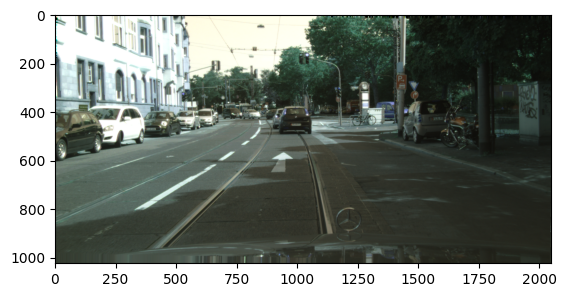

1/1 [==============================] - 0s 412ms/step


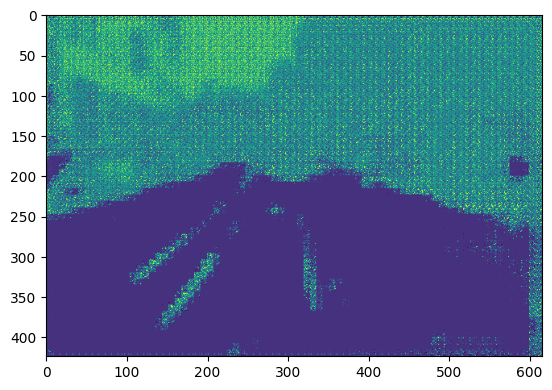

In [41]:
val_test_image = r"C:\Users\barau\Documents\FormationOpenClassrooms\Projet8\data-segmentation\processed_data\validation_data\frankfurt_000000_002963.png"

plt.imshow(cv2.imread(val_test_image, cv2.IMREAD_COLOR))
plt.show()

out = model.predict_segmentation(
    inp=val_test_image,
    out_fname="out.png"
)

plt.imshow(out)
plt.show()

In [63]:
print(f"Mean IU : {round(evaluation['mean_IU'],3)}")

categories_set = {label.categoryId : label.name for label in labels}
for i, cat in enumerate(categories_set):
    print(f"-- {categories_set[cat]} : {round(evaluation['class_wise_IU'][i],3)} IU")


Mean IU : 0.137
-- ground : 0.011 IU
-- rail track : 0.598 IU
-- tunnel : 0.216 IU
-- traffic sign : 0.006 IU
-- terrain : 0.198 IU
-- sky : 0.035 IU
-- rider : 0.002 IU
-- license plate : 0.032 IU


We have to be honest. This is pretty bad.
Next time, we'll try transfer learning.

# Transfer learning